In [64]:
import numpy as np
from os.path import isfile,join
from os import listdir
from scipy import signal as sg
from scipy.signal import butter,lfilter,freqz
import matplotlib.pyplot as plt
from scipy import hamming
import soundfile as sf
import scipy
import numpy
from scipy.fftpack import dct
from python_speech_features import mfcc
from python_speech_features import logfbank
from scipy.fftpack import fft
from scipy.io import wavfile
import soundfile as sf
import math
import tensorflow
from keras.utils import np_utils
from keras.models import Sequential
from keras.models import model_from_yaml
from keras.models import model_from_json
from keras.layers import Dense

from keras import backend
from keras.layers import Embedding
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [65]:
babycry=[f for f in listdir("D:/PBL5/Data/301 - Crying baby") if isfile(join("D:/PBL5/Data/301 - Crying baby", f))]

nonbabycry=[f for f in listdir("D:/PBL5/Data/902 - Noise") if isfile(join("D:/PBL5/Data/902 - Noise", f))]
babysilence=[f for f in listdir('D:/PBL5/Data/901 - Silence') if isfile(join('D:/PBL5/Data/901 - Silence', f))]
babylaugh=[f for f in listdir('D:/PBL5/Data/903 - Baby laugh') if isfile(join('D:/PBL5/Data/903 - Baby laugh',f))]

In [66]:
baby_cry=[]
for each in range(0,len(babycry)) :
    cry='D:/PBL5/Data/301 - Crying baby' + '/' + babycry[each] 
    baby_cry.append(cry)

In [67]:
non_babycry=[]
for each in range(0,len(nonbabycry)) :
    x='D:/PBL5/Data/902 - Noise' + '/' + nonbabycry[each] 
    non_babycry.append(x)

In [68]:
baby_silence=[]
for each in range(0,len(babysilence)) :
    silence='D:/PBL5/Data/901 - Silence' + '/' + babysilence[each] 
    baby_silence.append(silence)

In [69]:
baby_laugh=[]
for each in range(0,len(babylaugh)) :
    laugh='D:/PBL5/Data/903 - Baby laugh' + '/' + babylaugh[each] 
    baby_laugh.append(laugh)
  
nonbaby_cry=baby_silence+baby_laugh+non_babycry

In [70]:
len(baby_cry)

108

In [71]:
def butter_lowpass(cutoff,fs,order=5):
    nyq=0.5*fs
    normal_cutoff=cutoff/nyq
    b,a=butter(order,normal_cutoff,btype='low',analog=False)
    return b,a

In [72]:

def butter_lowpass_filter(data,cutoff,fs,order=5):
    b,a=butter_lowpass(cutoff,fs,order=order)
    y=lfilter(b,a,data)
    return y

In [73]:
def feature(soundfile):
    s,r=sf.read(soundfile)
    x=np.array_split(s,32)
    
    logg=[]
    for i in x:
             
             xx=np.mean(logfbank(i,r,nfilt=40,nfft=1103),axis=0)
             logg.append(xx)
        
    return  logg  

In [74]:
r=feature(baby_cry[10])

In [80]:
sf.read("D:\\PBL5\\Data\\301 - Crying baby\\TrieuPhone.m4a")

LibsndfileError: Error opening 'D:\\PBL5\\Data\\301 - Crying baby\\TrieuPhone.m4a': Format not recognised.

In [75]:
data=np.zeros((1274,32,40))
output=[]
for i in range(0,len(baby_cry)):
       r=feature(baby_cry[i])
       
       #r=list(r)
       data[i,:,:]=r
       output.append(1) 
        
all=baby_cry+nonbabycry
for i in range(len(baby_cry)-1,len(all)-1):
       #r=list(r)
       r=feature(all[i])
       
       data[i,:,:]=r
       output.append(0)

LibsndfileError: Error opening '1-100032-A.ogg': System error.

In [ ]:
def Mfcc(audiofile):
    s,r=sf.read(audiofile)
    #print(len(s.shape))
    #if len(s.shape)==2:
     #   s=s[0,:]
    #print(len(s.shape))

    x=np.array_split(s,64)
    #print(x)
    logg=np.zeros((64,12))
    for i in range(len(x)):
        
        
        m=np.mean(mfcc(x[i],r, numcep=12,nfft=2048),axis=0)
        #print(np.shape(m))
        xx= m
        logg[i,:]=m

    return logg

In [ ]:
# data=np.zeros((1274,64,12))
data=np.zeros((432,64,12))
output=[]
for i in range(0,len(baby_cry)):
       print(baby_cry[i])
       r=Mfcc(baby_cry[i])
       
       #r=list(r)
       data[i,:,:]=r
       output.append(1) 
        
all=baby_cry+nonbaby_cry
for i in range(len(baby_cry)-1,len(all)-1):
       #r=list(r)
       #print(all[i]) 
       r=Mfcc(all[i])
       
       data[i,:,:]=r
       output.append(0)  

D:/PBL5/Data/301 - Crying baby/1-187207-A.ogg
D:/PBL5/Data/301 - Crying baby/1-211527-A.ogg
D:/PBL5/Data/301 - Crying baby/1-211527-B.ogg
D:/PBL5/Data/301 - Crying baby/1-211527-C.ogg
D:/PBL5/Data/301 - Crying baby/1-22694-A.ogg
D:/PBL5/Data/301 - Crying baby/1-22694-B.ogg
D:/PBL5/Data/301 - Crying baby/1-60997-A.ogg
D:/PBL5/Data/301 - Crying baby/1-60997-B.ogg
D:/PBL5/Data/301 - Crying baby/2-107351-A.ogg
D:/PBL5/Data/301 - Crying baby/2-107351-B.ogg
D:/PBL5/Data/301 - Crying baby/2-151079-A.ogg
D:/PBL5/Data/301 - Crying baby/2-50665-A.ogg
D:/PBL5/Data/301 - Crying baby/2-50666-A.ogg
D:/PBL5/Data/301 - Crying baby/2-66637-A.ogg
D:/PBL5/Data/301 - Crying baby/2-66637-B.ogg
D:/PBL5/Data/301 - Crying baby/2-80482-A.ogg
D:/PBL5/Data/301 - Crying baby/3-151080-A.ogg
D:/PBL5/Data/301 - Crying baby/3-151081-A.ogg
D:/PBL5/Data/301 - Crying baby/3-151081-B.ogg
D:/PBL5/Data/301 - Crying baby/3-152007-A.ogg
D:/PBL5/Data/301 - Crying baby/3-152007-B.ogg
D:/PBL5/Data/301 - Crying baby/3-152007-C.o

In [ ]:
input=data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(input, output, test_size=0.30, random_state=None)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify = y_temp, test_size=0.5, random_state=None)

In [ ]:
from keras.layers import Reshape, Flatten, Dropout, Concatenate, BatchNormalization
from keras.models import Sequential,model_from_json
from keras.layers import Conv2D,Conv1D,MaxPooling1D,GlobalAveragePooling1D,GlobalMaxPooling1D
from keras.layers import MaxPooling2D
from keras.layers import Flatten,Dropout
from keras import optimizers, callbacks
import numpy as np
from keras.layers import Dense,Activation
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array

In [ ]:
from keras.layers import Reshape, Flatten, Dropout, Concatenate, BatchNormalization

model2 = Sequential()
model2.add(Conv1D(64, 2, activation='relu', input_shape=(64, 12))) # first convolutional layer
model2.add(Conv1D(40,2,padding='valid', activation='relu',strides=1)) # second convolutional layer
model2.add(Dropout(0.4))
model2.add(GlobalMaxPooling1D())
model2.add(Dense(40))
model2.add(Dropout(0.4))
model2.add(Activation('relu'))
model2.add(BatchNormalization(epsilon=0.001,momentum=0.9, weights=None))
model2.add(Dense(1))# fully connected layer model predicts 1 or 0
model2.add(Activation('sigmoid'))

In [ ]:
from keras.optimizers import Adam
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 63, 64)            1600      
                                                                 
 conv1d_3 (Conv1D)           (None, 62, 40)            5160      
                                                                 
 dropout_2 (Dropout)         (None, 62, 40)            0         
                                                                 
 global_max_pooling1d_1 (Glo  (None, 40)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dropout_3 (Dropout)         (None, 40)                0         
                                                      

In [ ]:
# train_x = np.asarray(X_train)
# train_y = np.asarray(y_train)
# validation_x = np.asarray(X_val)
# validation_y = np.asarray(y_val)

In [ ]:
# history = model2.fit(X_train, y_train, epochs=100, validation_data=(X_val,y_val),batch_size=10, shuffle=False,verbose=2)
history = model2.fit(np.asarray(X_train), np.asarray(y_train), epochs=100, validation_data=(np.asarray(X_val),np.asarray(y_val)),batch_size=10, shuffle=False,verbose=2)


Epoch 1/100
31/31 - 2s - loss: 0.7076 - accuracy: 0.5960 - val_loss: 0.5647 - val_accuracy: 0.7538 - 2s/epoch - 56ms/step
Epoch 2/100
31/31 - 0s - loss: 0.4859 - accuracy: 0.7616 - val_loss: 0.4305 - val_accuracy: 0.8923 - 198ms/epoch - 6ms/step
Epoch 3/100
31/31 - 0s - loss: 0.3777 - accuracy: 0.8576 - val_loss: 0.3423 - val_accuracy: 0.8923 - 180ms/epoch - 6ms/step
Epoch 4/100
31/31 - 0s - loss: 0.3106 - accuracy: 0.8742 - val_loss: 0.3060 - val_accuracy: 0.9538 - 165ms/epoch - 5ms/step
Epoch 5/100
31/31 - 0s - loss: 0.2493 - accuracy: 0.9106 - val_loss: 0.2797 - val_accuracy: 0.9692 - 145ms/epoch - 5ms/step
Epoch 6/100
31/31 - 0s - loss: 0.2189 - accuracy: 0.9503 - val_loss: 0.2380 - val_accuracy: 0.9538 - 127ms/epoch - 4ms/step
Epoch 7/100
31/31 - 0s - loss: 0.1843 - accuracy: 0.9503 - val_loss: 0.2202 - val_accuracy: 0.9538 - 120ms/epoch - 4ms/step
Epoch 8/100
31/31 - 0s - loss: 0.1632 - accuracy: 0.9603 - val_loss: 0.2066 - val_accuracy: 0.9538 - 126ms/epoch - 4ms/step
Epoch 9/10

In [ ]:
model2.evaluate(np.asarray(X_val),np.asarray(y_val))

3/3 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9846


[0.04753074049949646, 0.9846153855323792]

In [ ]:
model2.evaluate(np.asarray(X_test),np.asarray(y_test))

3/3 [==============================] - 0s 4ms/step - loss: 0.1081 - accuracy: 0.9231


[0.10814749449491501, 0.9230769276618958]

In [ ]:
model2.evaluate(np.asarray(X_train),np.asarray(y_train))

10/10 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 1.0000


[0.010936729609966278, 1.0]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


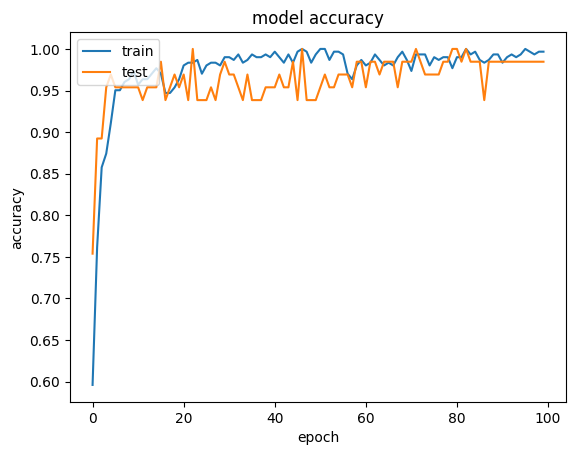

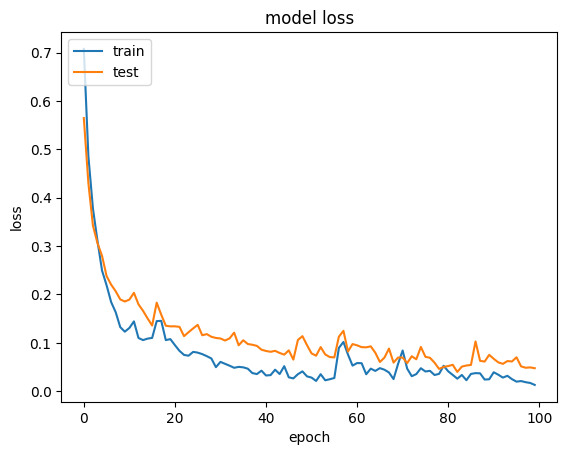

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
def plot_confusion_matrix(test_y, predicted_y):
    # Confusion matrix
    C = confusion_matrix(test_y, predicted_y)
    # Recall matrix
    A = (((C.T)/(C.sum(axis=1))).T)
    # Precision matrix
    B = (C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    labels = ['non-babycry(0)','babycry(1)']
    cmap=sns.light_palette("purple")
    plt.subplot(1,3,1)
    sns.heatmap(C, annot=True, cmap=cmap,fmt="d", xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Confusion matrix')
    plt.subplot(1,3,2)
    sns.heatmap(A, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Recall matrix')
    plt.subplot(1,3,3)
    sns.heatmap(B, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Precision matrix')
    plt.show()

In [ ]:
y = model2.predict(X_test)

3/3 [==============================] - 0s 1ms/step


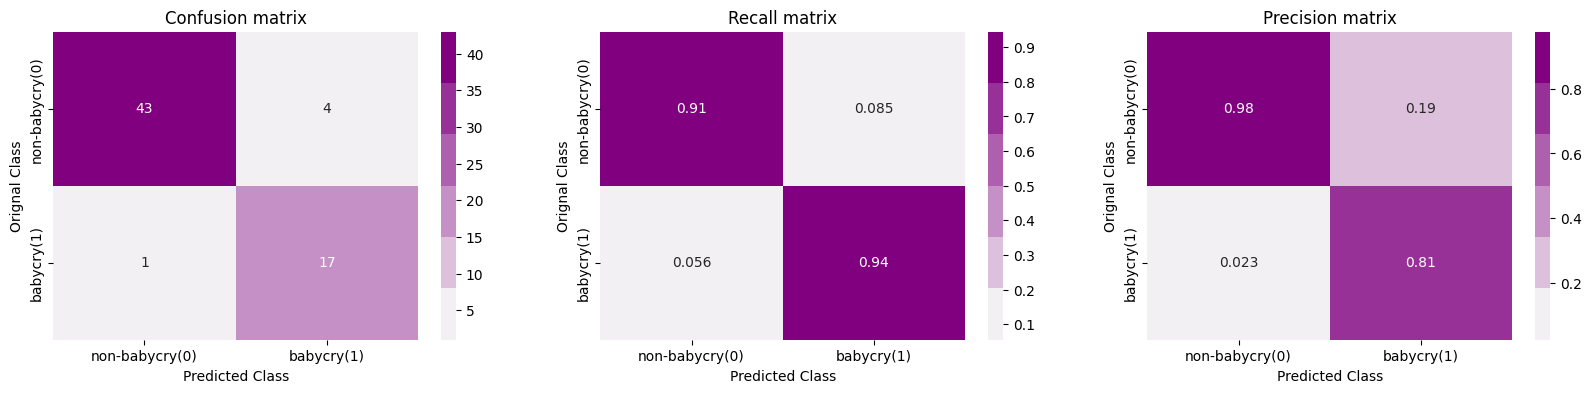

In [ ]:
plot_confusion_matrix(y_test, y.round())

In [ ]:
with open('my_cnn.json','w') as f:
    f.write(model2.to_json())

In [ ]:
model2.save_weights("my_cnn.h5")